In [10]:
%pip install matplotlib pandas seaborn scikit-learn dtale seaborn


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [11]:
import sys
import os

import dtale
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.abspath("./src"))

from utils import fraud_licit_ratio, calcular_nulos, split_by_suffix, nan_ratio


In [12]:
df_tr = pd.read_csv('./dataset/train_transaction.csv')
df_id = pd.read_csv('./dataset/train_identity.csv')

In [13]:
df_tr.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
nan_ratio(df_tr, 'Transanciones')

nan_ratio(df_id, 'Entidades')

Top 10 columns with highest NaN ratio in Transanciones:
dist2    0.936284
D7       0.934099
D13      0.895093
D14      0.894695
D12      0.890410
D6       0.876068
D9       0.873123
D8       0.873123
V153     0.861237
V139     0.861237
dtype: float64

Columns with >50% NaN in Transanciones: ['dist2', 'D7', 'D13', 'D14', 'D12', 'D6', 'D9', 'D8', 'V153', 'V139', 'V162', 'V161', 'V154', 'V138', 'V158', 'V157', 'V163', 'V156', 'V155', 'V149', 'V148', 'V147', 'V146', 'V142', 'V141', 'V140', 'V151', 'V152', 'V145', 'V144', 'V150', 'V143', 'V160', 'V166', 'V164', 'V159', 'V165', 'V322', 'V332', 'V338', 'V337', 'V336', 'V335', 'V334', 'V333', 'V331', 'V323', 'V330', 'V328', 'V327', 'V326', 'V325', 'V324', 'V329', 'V339', 'V240', 'V235', 'V252', 'V249', 'V248', 'V247', 'V246', 'V244', 'V243', 'V242', 'V241', 'V237', 'V236', 'V233', 'V254', 'V232', 'V231', 'V230', 'V229', 'V228', 'V217', 'V226', 'V225', 'V224', 'V223', 'V218', 'V253', 'V219', 'V266', 'V262', 'V268', 'V267', 'V273', 'V274', 'V275

In [15]:
df_full = pd.merge(
    df_tr,
    df_id,
    on="TransactionID",    # clave común
    how="inner"            # solo intersección de IDs
)

print("Shape merged inner:", df_full.shape)
dtale.show(df_full)

Shape merged inner: (144233, 434)


In [16]:
df_full_with_NAN = pd.merge(
    df_tr,
    df_id,
    on="TransactionID",    # clave común
    how="outer"            # solo intersección de IDs
)

print("Shape merged Outer:", df_full.shape)
dtale.show(df_full_with_NAN)

Shape merged Outer: (144233, 434)


In [17]:
calcular_nulos(df_full_with_NAN)
fraud_licit_ratio(df_full_with_NAN)

Cantidad de valores nulos en isFraud: 0

Distribución de isFraud:
Clase 0: 569877 registros (96.50%)
Clase 1: 20663 registros (3.50%)


In [18]:
# Define threshold: drop columns with more than 70% NaN
threshold = 0.4

df_full_reduced  = df_full.dropna(axis=1, thresh=int(len(df_full)*(1-threshold)))

print("Shape original Merged:", df_full_reduced.shape)

Shape original Merged: (144233, 247)


In [19]:
calcular_nulos(df_full_reduced)
fraud_licit_ratio(df_full_reduced)

Cantidad de valores nulos en isFraud: 0

Distribución de isFraud:
Clase 0: 132915 registros (92.15%)
Clase 1: 11318 registros (7.85%)


In [20]:
df_full_reduced.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_20,id_28,id_29,id_31,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0,86506,50.000,H,4497,514.0,150.0,mastercard,102.0,...,144.0,New,NotFound,samsung browser 6.2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,0,86535,15.000,H,2803,100.0,150.0,visa,226.0,...,500.0,New,NotFound,mobile safari 11.0,T,F,F,T,mobile,iOS Device
2,2987010,0,86549,75.887,C,16496,352.0,117.0,mastercard,134.0,...,142.0,Found,Found,chrome 62.0,F,F,T,T,desktop,Windows
3,2987011,0,86555,16.495,C,4461,375.0,185.0,mastercard,224.0,...,507.0,New,NotFound,chrome 62.0,F,F,T,T,desktop,NaN
4,2987016,0,86620,30.000,H,1790,555.0,150.0,visa,226.0,...,575.0,Found,Found,chrome 62.0,T,F,T,T,desktop,MacOS


In [21]:
df_full_reduced.isna().sum().sort_values(ascending=False)

DeviceInfo       25567
id_13            16913
id_16            14893
V235             13964
V247             13964
                 ...  
C1                   0
card1                0
ProductCD            0
isFraud              0
TransactionID        0
Length: 247, dtype: int64

In [22]:
df_full_reduced.describe(include='object').T

,count,unique,top,freq
ProductCD,144233,4,C,62192
card4,144049,4,visa,89299
card6,144055,3,credit,75090
P_emaildomain,130842,59,gmail.com,54140
R_emaildomain,131083,60,gmail.com,55079
id_12,144233,2,NotFound,123025
id_15,140985,3,Found,67728
id_16,129340,2,Found,66324
id_28,140978,2,Found,76232
id_29,140978,2,Found,74926


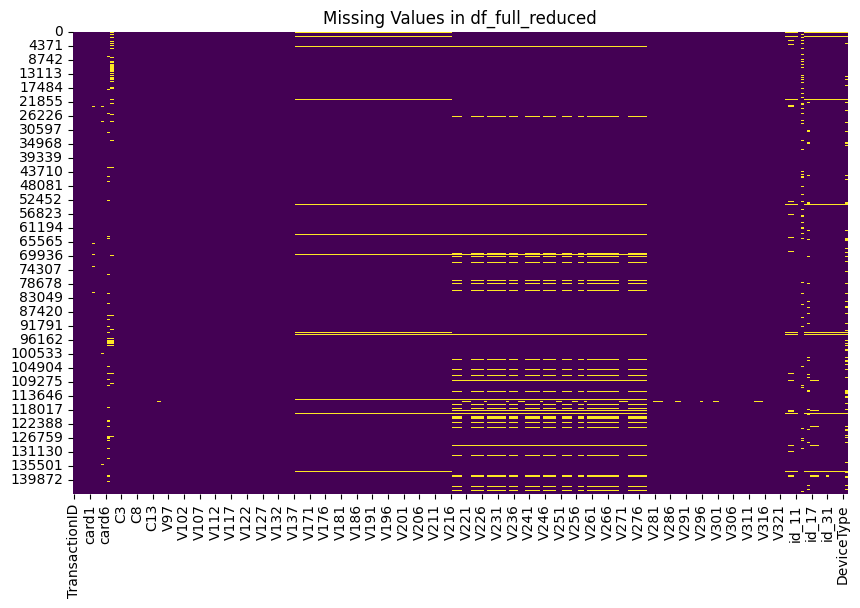

In [23]:
def visualize_missing_values(dataset, title):
    plt.figure(figsize=(10, 6))
    sns.heatmap(dataset.isna(), cbar=False, cmap='viridis')
    plt.title(title)
    plt.show()

# Example usage:
visualize_missing_values(df_full_reduced, 'Missing Values in df_full_reduced')


In [24]:
nulos = df_full_reduced.isna().sum()

print(nulos[nulos != 0])

card2           902
card3           172
card4           184
card5           956
card6           178
              ...  
id_36          3248
id_37          3248
id_38          3248
DeviceType     3423
DeviceInfo    25567
Length: 225, dtype: int64


In [25]:
df_full_cleaned = df_full_reduced.dropna()
df_full_cleaned.shape

(75988, 247)

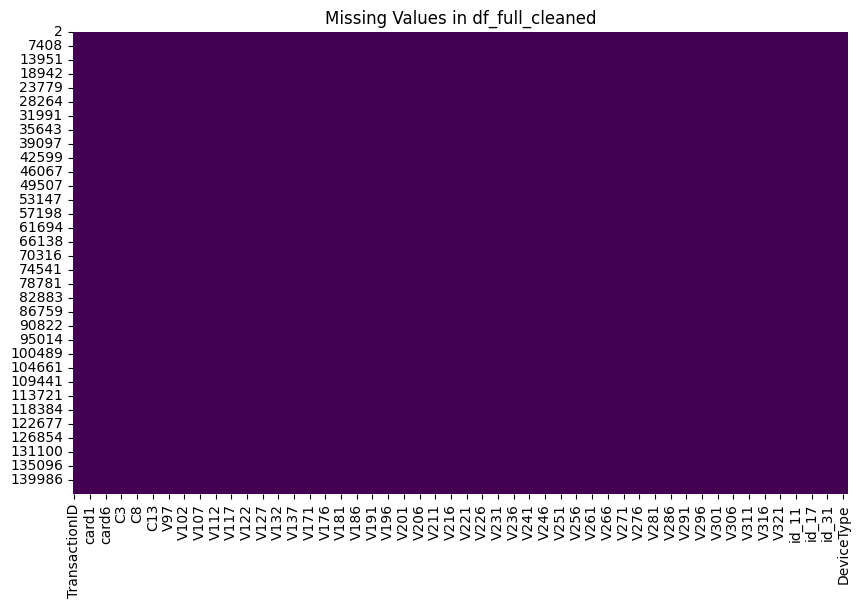

In [26]:
visualize_missing_values(df_full_cleaned, 'Missing Values in df_full_cleaned')

In [27]:
print(df_full_cleaned.shape)
df_full_cleaned.head()

(75988, 247)


,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_20,id_28,id_29,id_31,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
2,2987010,0,86549,75.887,C,16496,352.0,117.0,mastercard,134.0,...,142.0,Found,Found,chrome 62.0,F,F,T,T,desktop,Windows
8,2987040,0,87209,75.887,C,13329,569.0,117.0,visa,226.0,...,142.0,Found,Found,chrome 62.0,F,F,T,T,desktop,Windows
9,2987048,0,87317,42.294,C,15885,545.0,185.0,visa,138.0,...,507.0,New,NotFound,chrome 62.0,F,F,T,T,desktop,Windows
10,2987049,0,87317,3.595,C,12730,266.0,185.0,mastercard,224.0,...,507.0,New,NotFound,chrome 62.0,F,F,T,T,desktop,Windows
15,2987072,0,87752,6.767,C,13832,375.0,185.0,mastercard,224.0,...,566.0,New,NotFound,chrome 62.0 for android,F,F,T,T,mobile,BLADE A602 Build/MRA58K


In [28]:
# Example usage:
id_cols, card_cols, v_cols = split_by_suffix(df_full_reduced)

print("id_arr shape:", id_cols)
print("card_arr shape:", card_cols)
print("v_arr shape:", v_cols)

id_arr shape: ['id_01', 'id_02', 'id_05', 'id_06', 'id_11', 'id_12', 'id_13', 'id_15', 'id_16', 'id_17', 'id_19', 'id_20', 'id_28', 'id_29', 'id_31', 'id_35', 'id_36', 'id_37', 'id_38']
card_arr shape: ['card1', 'card2', 'card3', 'card4', 'card5', 'card6']
v_arr shape: ['V95', 'V96', 'V97', 'V98', 'V99', 'V100', 'V101', 'V102', 'V103', 'V104', 'V105', 'V106', 'V107', 'V108', 'V109', 'V110', 'V111', 'V112', 'V113', 'V114', 'V115', 'V116', 'V117', 'V118', 'V119', 'V120', 'V121', 'V122', 'V123', 'V124', 'V125', 'V126', 'V127', 'V128', 'V129', 'V130', 'V131', 'V132', 'V133', 'V134', 'V135', 'V136', 'V137', 'V167', 'V168', 'V169', 'V170', 'V171', 'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179', 'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187', 'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195', 'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211', 'V212', 'V213', 'V214', 'V215'

In [29]:

dtale.show(df_full_cleaned)